# Pythonで学ぶ制御工学 Part1

### 今日の目標
* Pythonの作法を知る
* ステップ応答を可視化
* 周波数応答を可視化

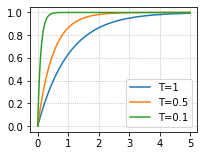

In [142]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(3, 2.3))
K = 1
T = (1, 0.5, 0.1)
for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, label='T='+str(T[i]))

ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.grid(ls=':')
ax.legend()

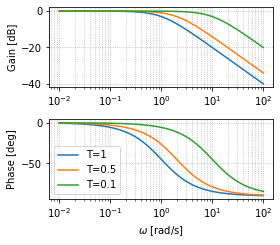

In [144]:
fig, ax = plt.subplots(2,1,figsize=(4,3.5))

for i in range(len(T)):
    P = tf([0, K],[T[i], 1])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    ax[0].semilogx(w, 20*np.log10(gain), label='T='+str(T[i]))
    ax[1].semilogx(w, phase*180/np.pi, label='T='+str(T[i]))
    
ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].legend()
ax[1].grid(which='both', ls=':')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_xlabel('$\omega$ [rad/s]')
fig.tight_layout()

## Pythonの基礎

* Enter で改行
* Shift + Enter で実行
* Tab で補完
* Shift + Tab でコマンドのヘルプ，「?」でも同じ

In [3]:
# コメントは「#」を文頭につける

In [4]:
print('Control')

Control


In [5]:
print('制御' + '工学')

制御工学


In [6]:
len('せいぎょこうがく')

8

In [7]:
id('Control')

4527887728

### 数値

In [8]:
12

12

In [19]:
3.22

3.22

In [18]:
1 + 3j

(1+3j)

In [9]:
0b1010

10

In [10]:
0xA1

161

In [11]:
10 / 5

2.0

In [12]:
17 // 5

3

In [13]:
17 % 5

2

In [14]:
3 ** 2

9

### 変数と型

In [15]:
x = 1
print(x)
print(type(x))

1
<class 'int'>


In [16]:
y = 1.0
print(y)
print(type(y))

1.0
<class 'float'>


In [20]:
z = 1 + 3j
print(z)
print(type(z))

(1+3j)
<class 'complex'>


In [17]:
msg = 'Control'
print(msg)
print(type(msg))

Control
<class 'str'>


In [19]:
ok = True
print(ok)
print(type(ok))

True
<class 'bool'>


変数は箱ではなく．名札のイメージ

In [23]:
x = 1
id(x)

4453823616

In [22]:
x = 3
id(x)

4453823680

In [25]:
y = 1
id(y)

4453823616

x と y が同じアドレス．つまり，このアドレスは1に対応している．

### リスト

In [26]:
data = [3, 5, 2, 4, 6, 1]
data

[3, 5, 2, 4, 6, 1]

In [28]:
data[0]

3

In [29]:
data[-1]

1

In [47]:
data[0] = 99
data

[99, 5, 2, 4, 6, 1, 8, 10, 10]

スライス

In [48]:
data[0:2]

[99, 5]

In [49]:
data[2:4]

[2, 4]

メソッド

In [50]:
data = [3, 5, 2, 4, 6, 1]
data.append(8)
print(data)

[3, 5, 2, 4, 6, 1, 8]


In [51]:
data.insert(0, 8)
print(data)

[8, 3, 5, 2, 4, 6, 1, 8]


In [52]:
data.pop(0)
print(data)

[3, 5, 2, 4, 6, 1, 8]


In [53]:
data.extend( [10, 10] )
print(data)

[3, 5, 2, 4, 6, 1, 8, 10, 10]


他にもいろいろあります．data. とタイプしてからTabキーを押してみてください

浅いコピー深いコピー

In [41]:
x = [ 1, 2, 3]
y = x
y[0] = 10
print(y) # [10, 2, 3]と出力される 
print(x) # xの値も[10, 2, 3]に変更される
print(id(x),id(y))

[10, 2, 3]
[10, 2, 3]
4524290768 4524290768


In [42]:
x = [ 1, 2, 3]
y = x.copy()
y[0] = 10
print(y) # [10, 2, 3]と出力される
print(x) # xの値は変更されずに[1, 2, 3]と出力される
print(id(x),id(y))

[10, 2, 3]
[1, 2, 3]
4524210848 4523388592


### タプル

In [43]:
k = (1, 2, 3)

In [44]:
k[0]

1

In [45]:
k[0] = 1

TypeError: 'tuple' object does not support item assignment

リストのように書き換えができません．また，メソッドもリストに比べると少ないです．

### if文

In [57]:
x = 1

if x < 0:
    print('x is negative')
elif x == 0:
    print('x is zero')
else:
    print('x is positive')

x is positive


### for文

In [58]:
for x in [0, 1, 2]: 
    print(x)

0
1
2


In [59]:
for x in range(0, 3): 
    print(x)

0
1
2


### 関数定義

In [50]:
def say_hello(): 
    print('こんにちは')

In [51]:
say_hello()

こんにちは


In [52]:
def subject(name): 
    print(name + '工学')

In [53]:
subject('制御')

制御工学


In [54]:
def add(a, b): 
    c = a + b
    return c

In [55]:
result = add(3, 5)
print(result)

8


## ライブラリ

### Numpy

関数・定数

In [83]:
np.cos(np.pi)

-1.0

In [84]:
np.log(np.e)

1.0

In [87]:
20 * np.log10(1/np.sqrt(2))

-3.0102999566398125

配列の作成

In [65]:
T = np.arange(0, 10, 1)
print(T)

[0 1 2 3 4 5 6 7 8 9]


In [88]:
T[0::2] # 偶数番号

array([0, 2, 4, 6, 8])

In [89]:
T[1::2] # 奇数番号

array([1, 3, 5, 7, 9])

In [90]:
T[::-1] # 反転

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

行列・ベクトル

In [64]:
A = np.array([ [1, 2], [-3, 4]])
print(A)

[[ 1  2]
 [-3  4]]


In [73]:
A[0, 0]

1

In [72]:
A[:, 0]

array([ 1, -3])

In [74]:
A[0, :]

array([1, 2])

In [75]:
print(A.T) #転置

[[ 1 -3]
 [ 2  4]]


In [76]:
np.linalg.det(A) #行列式

10.000000000000002

In [77]:
np.linalg.matrix_rank(A) #ランク

2

In [86]:
w, v = np.linalg.eig(A)
print('eigenvalue=',w)
print('eigenvector=\n',v)

eigenvalue= [2.5+1.93649167j 2.5-1.93649167j]
eigenvector=
 [[0.38729833-0.5j 0.38729833+0.5j]
 [0.77459667+0.j  0.77459667-0.j ]]


In [78]:
C = np.linalg.inv(A) # 逆行列
print(C)

[[ 0.4 -0.2]
 [ 0.3  0.1]]


### Matplotlib

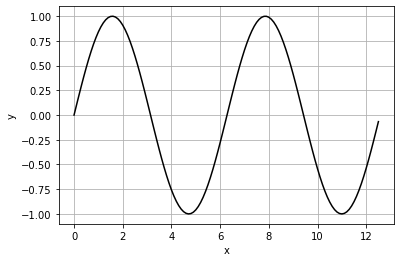

In [91]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 4 * np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

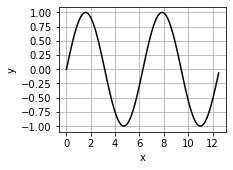

In [92]:
fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(x, y, c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks(np.linspace(0, 12, 7))
ax.set_yticks(np.linspace(-1, 1, 9))

ax.grid()

線種や線の太さ，カラーなどの設定については，plt.plot? を実行して確認してください．

また，plt.plot とタイプしてから Shift+Tab でも確認できます

In [ ]:
plt.plot

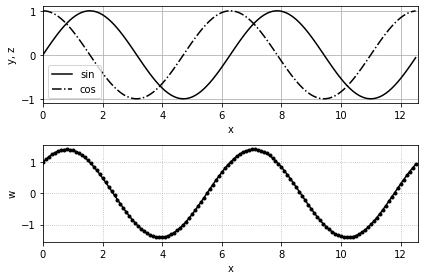

In [93]:
fig, ax = plt.subplots(2,1, figsize=(6, 4))

x = np.arange(0, 4 * np.pi, 0.1)
y = np.sin(x)
z = np.cos(x)
w = y + z

ax[0].plot(x, y, ls='-', label='sin', c='k')
ax[0].plot(x, z, ls='-.', label='cos', c='k')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y, z')
ax[0].set_xlim(0, 4*np.pi)
ax[0].grid()
ax[0].legend()

ax[1].plot(x, w, color='k', marker='.')
ax[1].set_xlabel('x')
ax[1].set_ylabel('w')
ax[1].set_xlim(0, 4*np.pi)
ax[1].grid(ls=':')

fig.tight_layout()
# fig.savefig("matplot_plotexp2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 制御工学の基礎
### ステップ応答の可視化

In [97]:
from control.matlab import *

In [98]:
P = tf( [0, 1], [0.5, 1])
y, t = step(P, np.arange(0, 5, 0.01))

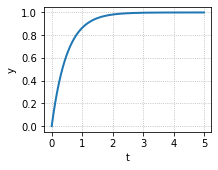

In [99]:
fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(t, y, lw=2)
ax.set_xticks(np.linspace(0, 5, 6))
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid(ls=':')

In [100]:
P = tf( [0 ,1], [0.5, 1])
P


    1
---------
0.5 s + 1

In [101]:
s = tf('s')
P1 = 1/(10*s + 1)
P1


    1
--------
10 s + 1

In [102]:
P2 = 1/((s+2)*(s+10)**2)
P2


            1
--------------------------
s^3 + 22 s^2 + 140 s + 200

In [103]:
stepinfo(P)

{'RiseTime': 1.093093093093093,
 'SettlingTime': 1.9374374374374375,
 'SettlingMin': 0.8995704003856553,
 'SettlingMax': 0.9990881180344776,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.9990881180344776,
 'PeakTime': 3.5,
 'SteadyStateValue': 0.9990881180344776}

In [104]:
stepinfo(P2)

{'RiseTime': 1.163163163163162,
 'SettlingTime': 2.147647647647646,
 'SettlingMin': 0.00449543526409081,
 'SettlingMax': 0.004992875922144357,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.004992875922144357,
 'PeakTime': 3.499999999999997,
 'SteadyStateValue': 0.004992875922144357}

### 周波数特性の可視化（ボード線図）

In [105]:
P


    1
---------
0.5 s + 1

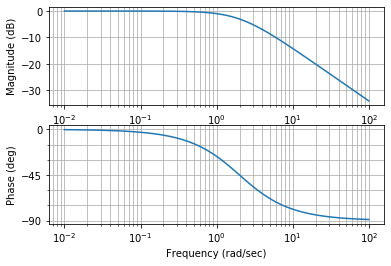

In [110]:
gain, phase, w = bode(P, logspace(-2, 2), Hz=False)

これでもよいのですが，見た目が良くないので．．．

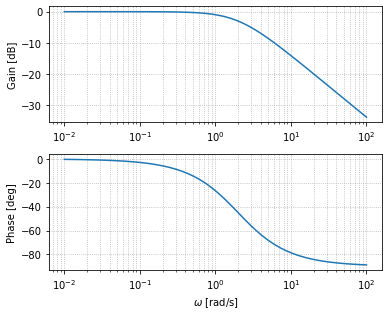

In [125]:
gain, phase, w = bode(P, logspace(-2, 2), Plot=False)

fig, ax = plt.subplots(2, 1, figsize=(5.5, 4.5))
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which='both', ls=':')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_xlabel('$\omega$ [rad/s]')
fig.tight_layout()

### ブロック線図の結合

In [127]:
S1 = tf( [0, 1], [1, 1])
S2 = tf( [1, 1], [1, 1, 1])
print(S1)
print(S2)


  1
-----
s + 1


   s + 1
-----------
s^2 + s + 1



直列結合

In [128]:
S = S2 * S1
print('S=', S)

S = series(S1, S2)
print('S=', S)

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1



分母分子の共通因子 s+1 が約分されない
この場合は，minreal を使う

In [129]:
S.minreal()


     1
-----------
s^2 + s + 1

並列結合

In [130]:
S = S1 + S2
print('S=', S)
S = parallel(S1, S2)
print('S=', S)

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1



フィードバック結合

In [131]:
S = S1*S2 / (1 + S1*S2)
print('S=', S)
S = feedback(S1*S2, 1)
print('S=', S)

S= 
         s^4 + 3 s^3 + 4 s^2 + 3 s + 1
-----------------------------------------------
s^6 + 4 s^5 + 9 s^4 + 13 s^3 + 12 s^2 + 7 s + 2

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [132]:
print('S=', S.minreal())

S= 
     1
-----------
s^2 + s + 2

